In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("census-income .csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

Ans 1

In [4]:
data.occupation.nunique()

15

Ans 2

In [5]:
data.loc[(data['occupation'] == 'Tech-support') & (data['annual_income'] == '>50K')].shape[0]

283

Ans 3

In [6]:
missing = 0
misscol = []
for i in data.columns:
    if "?" in data[i].value_counts().index:
        misscol.append(i)
        missing += data[i].value_counts()["?"]
missing

4262

Ans 4 If there are missing values in the Marital Status column we will fill them with Mode

Ans 5

In [7]:
data.loc[(data["workclass"] == 'Private') & (data["native-country"] != "United-States"),["workclass","native-country"]].shape[0]

2561

Ans 6

In [8]:
data.loc[(data["annual_income"] == "<=50K") | (data["hours-per-week"] >= 40)].shape[0]

31823

The education-num and education columns are duplicate of each other the education column makes much more sense hence we are dropping the education-num column and will use education column for solving our problem

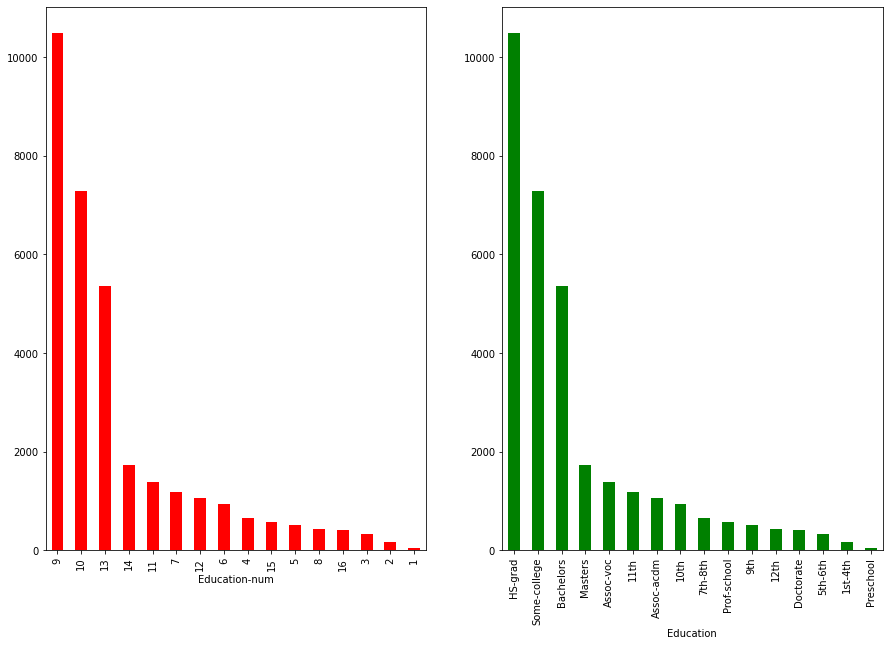

In [9]:
plt.subplots(1,2,figsize = (15,10))
plt.subplot(1,2,1)
data["education-num"].value_counts().plot(kind = "bar",color = 'red')
plt.xlabel("Education-num")
plt.subplot(1,2,2)
data.education.value_counts().plot(kind = 'bar',color = 'green')
plt.xlabel("Education")
plt.show()

In [10]:
data.drop("education-num",axis=1,inplace=True)

We will check the outliers and replace the outlier with the upper limit and the lower limit whichever fits well according to the IQR method instead of dropping the outliers and loosing datapoints.

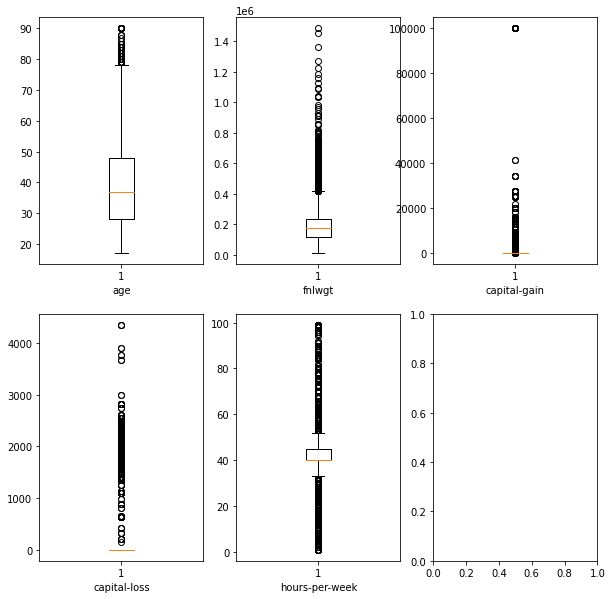

In [11]:
fig = plt.subplots(2,3,figsize = (10,10))
i=0
for columns in data.columns:
    if data[columns].dtype in ("int64","float64"):
        i+=1
        plt.subplot(2,3,i)
        plt.boxplot(data[columns])
        plt.xlabel(columns)


From above plot we can see that there are no whiskers for capital loss and capital gain, on checking upon the Q3 and upperlimit comes to be 0 and replacing the outliers with upperlimit will give us the whole datapoints as 0 and dropping the outliers will also give us 0 for all the detapoints so lets convert this data into categorical value of either an individual has capita-gain or not same for capital-loss


In [12]:
def outlier(index,data):
    Q1 = data[index].quantile(0.25)
    Q3 = data[index].quantile(0.75)
    IQR = Q3 - Q1
    upperlimit = Q3 + 1.5 * IQR
    lowerlimit = Q1 - 1.5 * IQR
    return upperlimit,lowerlimit

print("upper and lower limit of Capital gain : ",outlier("capital-gain",data))
print("upper and lower limit of Capital loss : ",outlier("capital-loss",data))



upper and lower limit of Capital gain :  (0.0, 0.0)
upper and lower limit of Capital loss :  (0.0, 0.0)


In [13]:
data.loc[data["capital-gain"] > 0 ,'capital-gain'] = 1
data.loc[data["capital-loss"] > 0 ,'capital-loss'] = 1
data = data.astype({"capital-gain":"category","capital-loss":"category"})

In [14]:
for columns in data.columns:
    if data[columns].dtype in ("int64","float64"):
        Q1 = data[columns].quantile(0.25)
        Q3 = data[columns].quantile(0.75)
        IQR = Q3 - Q1
        upperlimit = Q3 + 1.5 * IQR
        lowerlimit = Q1 - 1.5 * IQR
        data.loc[data[columns] >= upperlimit,[columns]] = upperlimit
        data.loc[data[columns] <= lowerlimit,[columns]] = lowerlimit



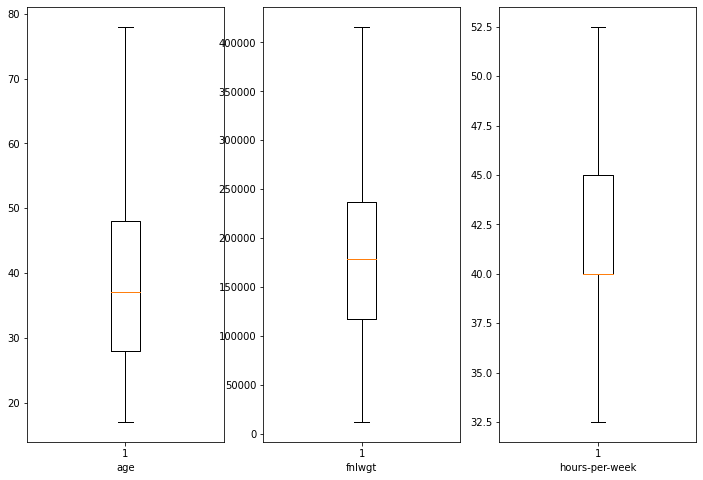

In [15]:
fig = plt.subplots(1,3,figsize = (12,8))
i=0
for columns in data.columns:
    if data[columns].dtype in ("int64","float64"):
        i+=1
        plt.subplot(1,3,i)
        plt.boxplot(data[columns])
        plt.xlabel(columns)

As seen in above plot now there are no outliers in our Data


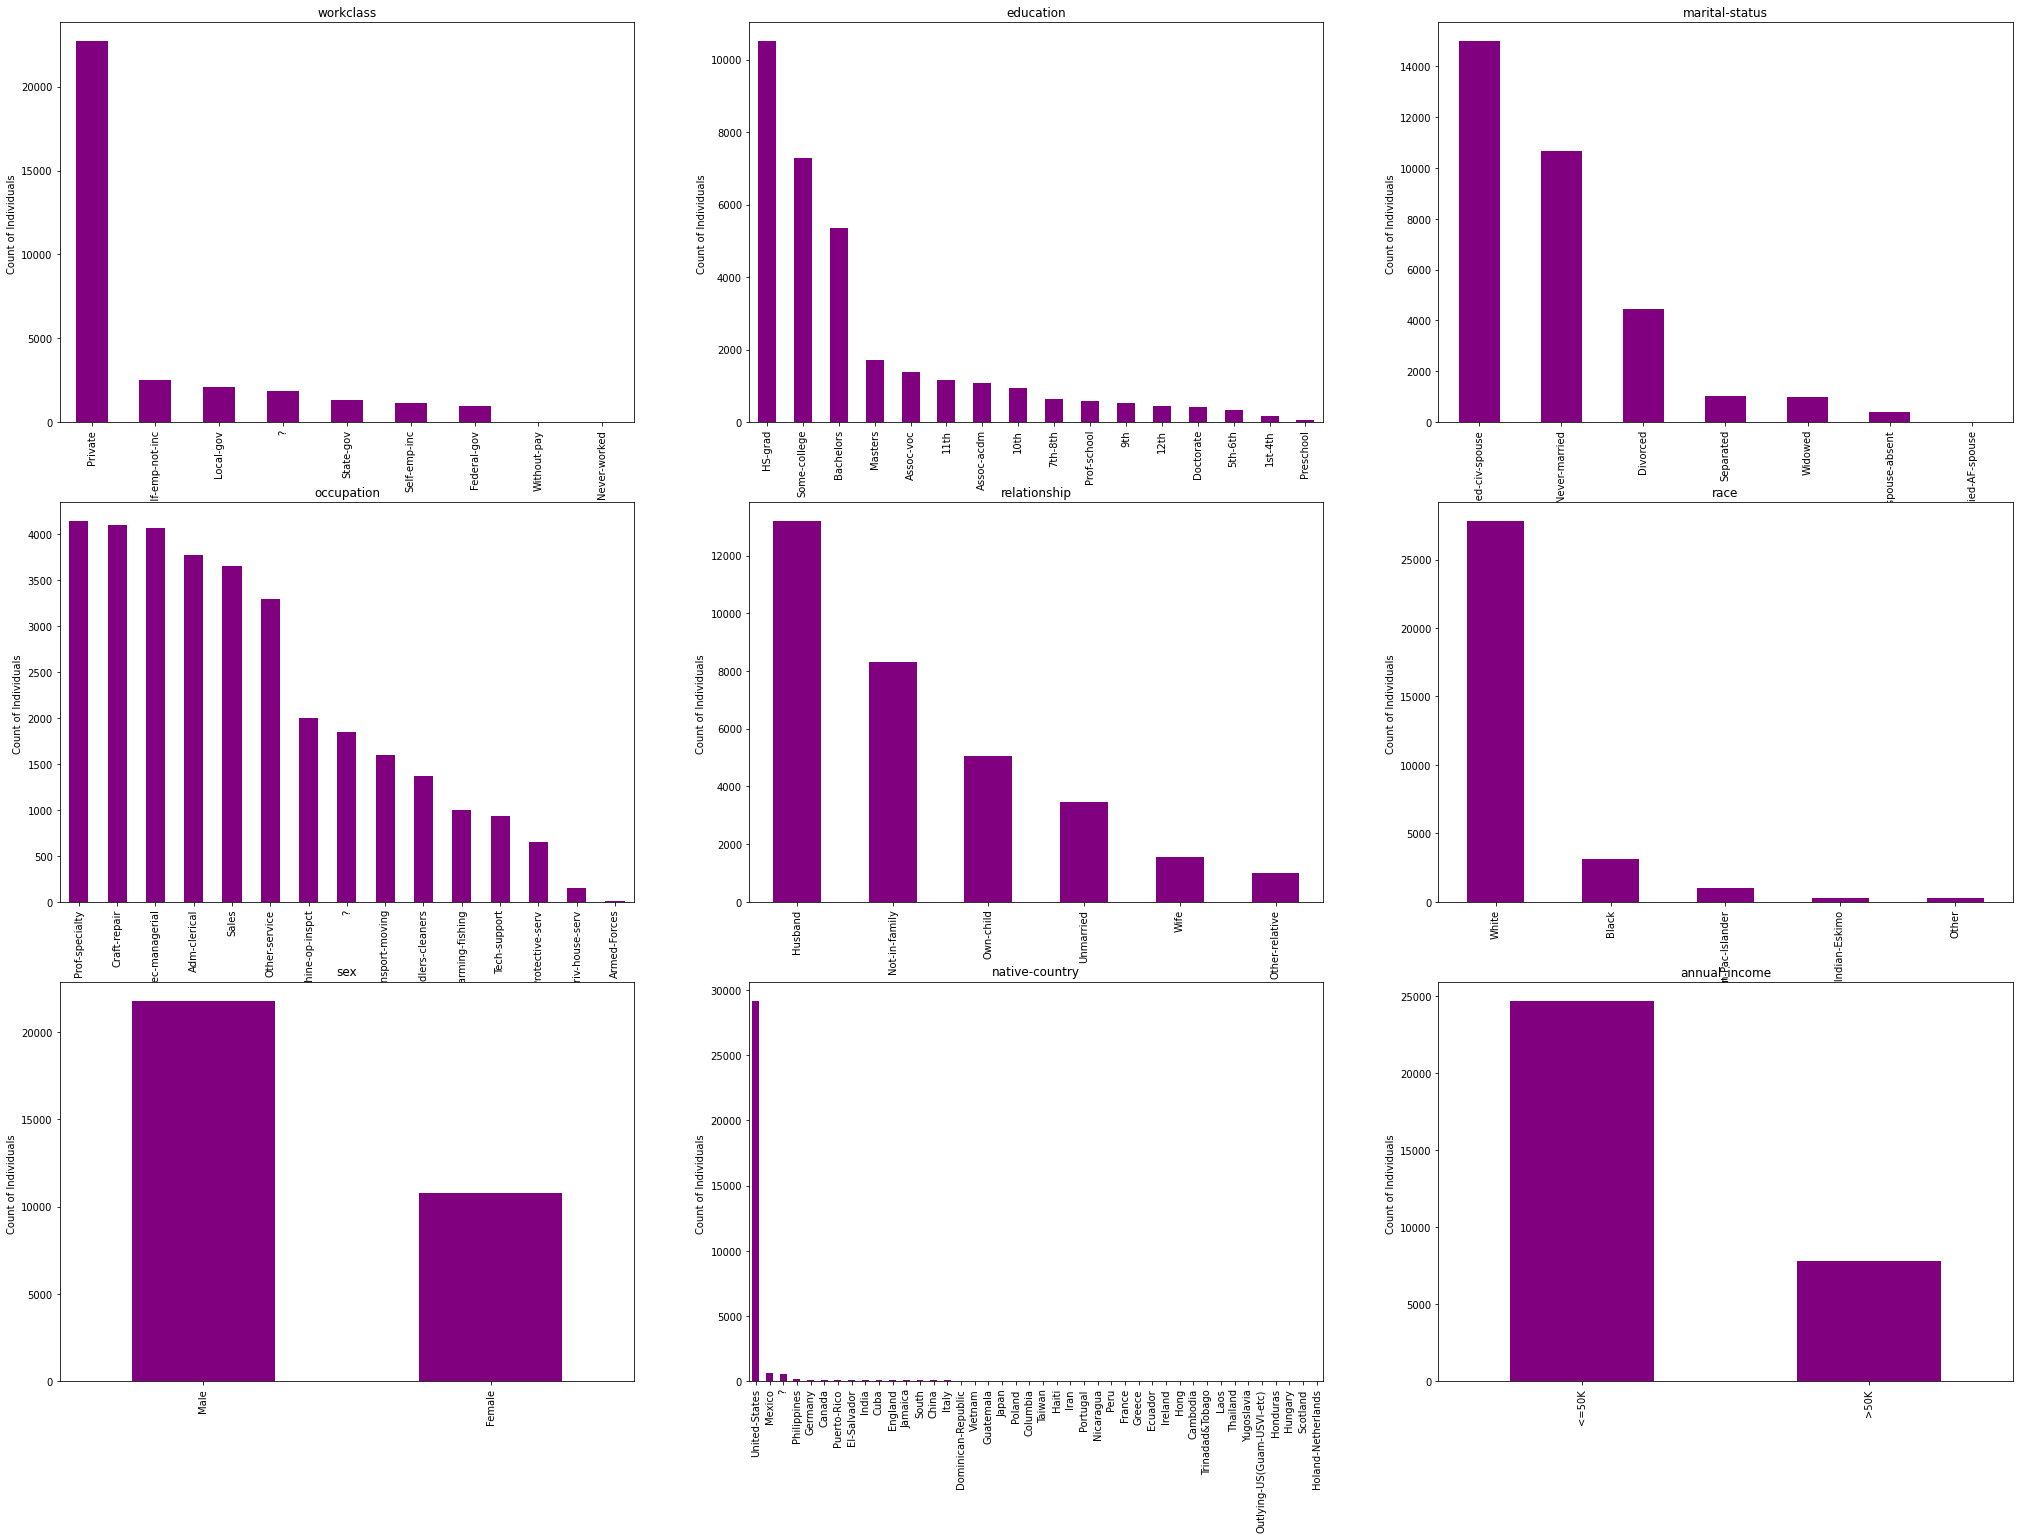

In [16]:
i=0
fig = fig = plt.subplots(3,3,figsize=(35,25))
for col in data.columns:
    if data[col].dtype == 'object':
        i+=1
        plt.subplot(3,3,i)
        data[col].value_counts().plot(kind="bar",color = "purple")
        plt.title(col)
        plt.ylabel("Count of Individuals ")

# Handling Missing Value

? present for variables Workclass,type of Occupation, native country .
replacing the ? with NAN and dropping the NA values 

In [17]:
for index in misscol:
    data.loc[data[index] == "?",index] = np.nan
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30162 non-null  int64   
 1   workclass       30162 non-null  object  
 2   fnlwgt          30162 non-null  int64   
 3   education       30162 non-null  object  
 4   marital-status  30162 non-null  object  
 5   occupation      30162 non-null  object  
 6   relationship    30162 non-null  object  
 7   race            30162 non-null  object  
 8   sex             30162 non-null  object  
 9   capital-gain    30162 non-null  category
 10  capital-loss    30162 non-null  category
 11  hours-per-week  30162 non-null  float64 
 12  native-country  30162 non-null  object  
 13  annual_income   30162 non-null  object  
dtypes: category(2), float64(1), int64(2), object(9)
memory usage: 3.0+ MB


We will now perform chi-squared statistic on all independent varaibles w.r.t dependent variables to check how much they are depenedent.

In [18]:
data["annual_income"].value_counts()

<=50K    22654
>50K      7508
Name: annual_income, dtype: int64

<AxesSubplot:xlabel='age'>

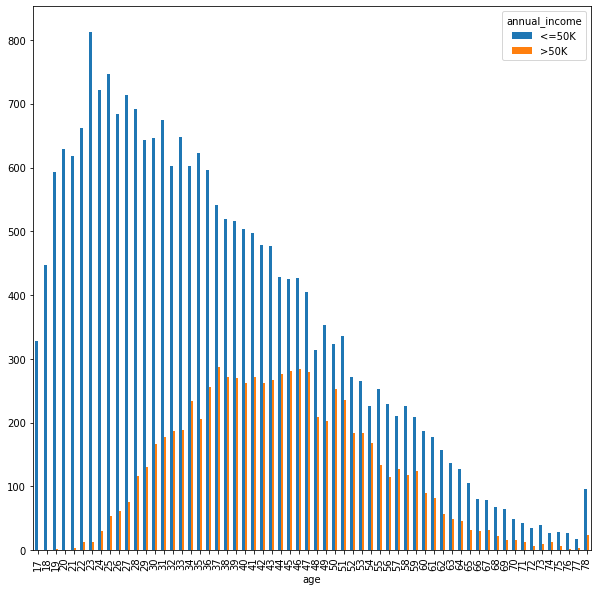

In [19]:

pd.crosstab(data.age,data["annual_income"]).plot(kind="bar",figsize = (10,10))


In [20]:
data.loc[(data["age"] >= 17) & (data["age"] <= 25),'newage'] = "freshers"
data.loc[(data["age"] >= 26) & (data["age"] <= 40),'newage'] = "intermediate experienced"
data.loc[(data["age"] >= 41) & (data["age"] <= 60),'newage'] = "highly experienced"
data.loc[(data["age"] >= 61) , 'newage'] = "retired"

<AxesSubplot:xlabel='newage'>

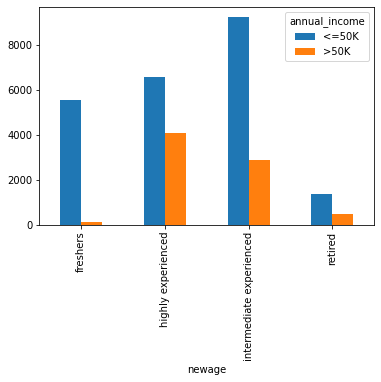

In [21]:
pd.crosstab(data.newage,data.annual_income).plot(kind="bar")

In [22]:
pd.crosstab(data.fnlwgt,data.annual_income)

annual_income,<=50K,>50K
fnlwgt,,
13769,1,0
14878,0,1
18827,1,0
19214,1,0
19302,2,3
...,...,...
415520,1,0
415578,0,1
415706,1,0


In [23]:
data.loc[(data["fnlwgt"] <= 103971.75),'fnlwgtn'] = 1
data.loc[(data["fnlwgt"] >= 103971.76) & (data["fnlwgt"] <= 207943.5),'fnlwgtn'] = 2
data.loc[(data["fnlwgt"] >= 207943.6) &(data["fnlwgt"] <= 311915.25),'fnlwgtn'] = 3
data.loc[(data["fnlwgt"] >= 311915.26),'fnlwgtn'] = 4


<AxesSubplot:xlabel='fnlwgtn'>

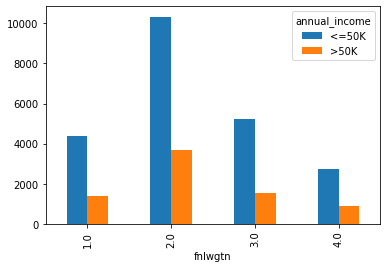

In [24]:
pd.crosstab(data.fnlwgtn,data.annual_income).plot(kind="bar")

<AxesSubplot:xlabel='hours-per-week'>

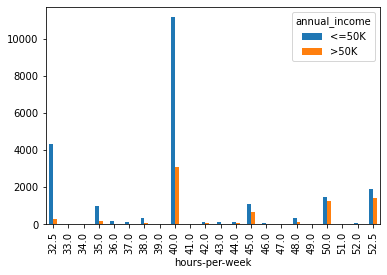

In [25]:
pd.crosstab(data["hours-per-week"],data["annual_income"]).plot(kind="bar")

<AxesSubplot:xlabel='working'>

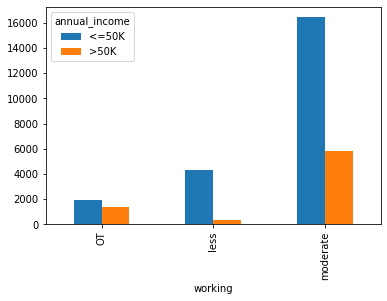

In [26]:
data.loc[data["hours-per-week"] < 33.0,"working"] = 'less'
data.loc[(data["hours-per-week"] >= 33.0) & (data["hours-per-week"] <= 52.0),"working"] = "moderate"
data.loc[data["hours-per-week"] > 52,"working"] = "OT"

pd.crosstab(data["working"],data["annual_income"]).plot(kind="bar")

In [27]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'annual_income',
       'newage', 'fnlwgtn', 'working'],
      dtype='object')

Now we have all the data in categorical format even the numerical ones and now we can proceed for checking their significance.
We have created new feature to convert the numerical data to categorical data so we have to consider that while selecting the features and doing all the tests going forward

# Chi-Squared Test

Null Hypothesis — that the 2 categorical variables to be compared are independent of each other

Alternate Hypothesis — that the 2 categorical variables being compared are dependent on each other.

aplha = 0.05

In [28]:
indexes = [ 'workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'native-country', 'annual_income',
       'newage', 'fnlwgtn', 'working']
data = data[indexes]
indexes.remove("annual_income")
data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,annual_income,newage,fnlwgtn,working
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,United-States,<=50K,intermediate experienced,1.0,moderate
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,United-States,<=50K,highly experienced,1.0,less
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,United-States,<=50K,intermediate experienced,3.0,moderate
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,United-States,<=50K,highly experienced,3.0,moderate
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,Cuba,<=50K,intermediate experienced,4.0,moderate


In [29]:
from scipy.stats import chi2_contingency
from scipy import stats

In [30]:
chi_table = pd.DataFrame(columns=["Feature","P_value"])
for ind in indexes:
    p_value = round(chi2_contingency(pd.crosstab(data[ind],data["annual_income"]))[1],3)
    s = pd.DataFrame({"Feature": [ind],"P_value" : [p_value]})
    chi_table = pd.concat([chi_table,s],ignore_index=True)
chi_table

,Feature,P_value
0,workclass,0.0
1,education,0.0
2,marital-status,0.0
3,occupation,0.0
4,relationship,0.0
5,race,0.0
6,sex,0.0
7,capital-gain,0.0
8,capital-loss,0.0
9,native-country,0.0


In [31]:
def chisquretest(data,col):
    observed_values = pd.crosstab(data["fnlwgtn"],data["annual_income"])
    observed_values["row_total"] = observed_values.sum(axis=1)
    observed_values.loc["col_total"] = observed_values.sum()

    expected_values = observed_values.copy()
    expected_values.iloc[:,:] = np.multiply.outer(observed_values.sum(1).values,observed_values.sum().values)/observed_values.sum().sum()
    expected_values

    chi_square = (((observed_values - expected_values)**2)/expected_values)
    chi_square["row_total"] = chi_square.sum(1)
    chi_square.loc["col_total"] = chi_square.sum()

    chi_square_score = chi_square.iloc[:-1,:-1].sum().sum()
    df = (observed_values.shape[0] - 1 )*(observed_values.shape[1]-1)
    p_value = stats.distributions.chi2.sf(chi_square_score, df)
    print("P_value for ",col," : " , round(p_value,3))

for col in indexes:
    chisquretest(data,col)


P_value for  workclass  :  0.0
P_value for  education  :  0.0
P_value for  marital-status  :  0.0
P_value for  occupation  :  0.0
P_value for  relationship  :  0.0
P_value for  race  :  0.0
P_value for  sex  :  0.0
P_value for  capital-gain  :  0.0
P_value for  capital-loss  :  0.0
P_value for  native-country  :  0.0
P_value for  newage  :  0.0
P_value for  fnlwgtn  :  0.0
P_value for  working  :  0.0


From above test we can reject our Null Hypothesis, and no need to drop any of the variables.

In [32]:
col_list = []
for col in data.columns:
    if ((data[col].dtype == 'object')):
        col_list.append(col)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in col_list:
    data[i]=labelencoder.fit_transform(data[i])

In [33]:
data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,annual_income,newage,fnlwgtn,working
0,5,9,4,0,1,4,1,1,0,38,0,2,1.0,2
1,4,9,2,3,0,4,1,0,0,38,0,1,1.0,1
2,2,11,0,5,1,4,1,0,0,38,0,2,3.0,2
3,2,1,2,5,0,2,1,0,0,38,0,1,3.0,2
4,2,9,2,9,5,2,0,0,0,4,0,2,4.0,2


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
XVar =  data[indexes]
vif_data["feature"] = XVar.columns
vif_data["VIF"] = [variance_inflation_factor(XVar.values, i) for i in range(len(XVar.columns))]
vif_data

,feature,VIF
0,workclass,6.079668
1,education,7.890398
2,marital-status,3.979940
3,occupation,3.130940
4,relationship,2.649131
5,race,17.726258
6,sex,4.466948
7,capital-gain,1.111685
8,capital-loss,1.060935
9,native-country,25.702210


As per the VIF analysis we can remove the columns native_country and race for our prediction model.

In [35]:
indexes.remove("race")
indexes.remove("native-country")

In [36]:
data.rename(columns={"annual_income":"Annual Income"},inplace=True)
data

,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,Annual Income,newage,fnlwgtn,working
0,5,9,4,0,1,4,1,1,0,38,0,2,1.0,2
1,4,9,2,3,0,4,1,0,0,38,0,1,1.0,1
2,2,11,0,5,1,4,1,0,0,38,0,2,3.0,2
3,2,1,2,5,0,2,1,0,0,38,0,1,3.0,2
4,2,9,2,9,5,2,0,0,0,4,0,2,4.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,2,7,2,12,5,4,0,0,0,38,0,2,3.0,2
32557,2,11,2,6,0,4,1,0,0,38,1,2,2.0,2
32558,2,11,6,0,4,4,0,0,0,38,0,1,2.0,2
32559,2,11,4,0,3,4,1,0,0,38,0,0,2.0,1


# Model Building

In [37]:
X = data[indexes]
Y = data["Annual Income"]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [39]:
from sklearn.preprocessing import StandardScaler

SC=StandardScaler()
x_train=SC.fit_transform(X_train)
x_test=SC.transform(X_test)

In [40]:
x_train.shape[0],x_test.shape[0]

(21113, 9049)

In [41]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()                        #Model Creation
model.fit(x_train,Y_train)                          #Model Fitting
pred = model.predict(x_test)                        #Predictions of class
proba_pred = model.predict_proba(x_test)[:,1]       #Probability prediction of class 0

In [42]:
model.score(x_test,Y_test)

0.7747817438390983

In [43]:
predictions = pd.DataFrame()
predictions["Actual"] = Y_test
predictions["pred"] = pred
predictions["proba_pred"] = proba_pred

In [44]:
for i in range(1,10):
    name = "prob_0.{}".format(i)
    predictions[name] = np.where((predictions['proba_pred']>i/10), 1,0)

In [45]:
predictions

,Actual,pred,proba_pred,prob_0.1,prob_0.2,prob_0.3,prob_0.4,prob_0.5,prob_0.6,prob_0.7,prob_0.8,prob_0.9
2135,0,0,0.095675,0,0,0,0,0,0,0,0,0
15639,0,0,0.099651,0,0,0,0,0,0,0,0,0
29059,0,0,0.412308,1,1,1,1,0,0,0,0,0
27523,0,0,0.312985,1,1,1,0,0,0,0,0,0
9280,0,0,0.302214,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16826,0,0,0.056244,0,0,0,0,0,0,0,0,0
25246,0,0,0.216433,1,1,0,0,0,0,0,0,0
18980,1,0,0.460876,1,1,1,1,0,0,0,0,0
953,0,0,0.050838,0,0,0,0,0,0,0,0,0


In [46]:
columns = predictions.columns.to_list()
columns.remove("Actual")
columns.remove("proba_pred")
columns

['pred',
 'prob_0.1',
 'prob_0.2',
 'prob_0.3',
 'prob_0.4',
 'prob_0.5',
 'prob_0.6',
 'prob_0.7',
 'prob_0.8',
 'prob_0.9']

In [47]:
from sklearn.metrics import confusion_matrix
df = pd.DataFrame(columns = ["sensitivity","specificity"],dtype="int64")

for col in columns:
    cm = confusion_matrix(Y_test,predictions[col])
    sen=cm[0,0]/(cm[0,0]+cm[0,1])
    sep=cm[1,1]/(cm[1,1]+cm[1,0])
    row = pd.DataFrame({"Pred Type": [col],"sensitivity" : [sen],"specificity" : [sep]})
    df = pd.concat([df,row],ignore_index=True)
df.set_index("Pred Type")
df["Total"] = df.sum(axis=1)

C:\Users\singh\AppData\Local\Temp\ipykernel_10716\3109935476.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["Total"] = df.sum(axis=1)


In [48]:
df


,sensitivity,specificity,Pred Type,Total
0,0.955648,0.239387,pred,1.195035
1,0.336635,0.914223,prob_0.1,1.250858
2,0.570816,0.859956,prob_0.2,1.430772
3,0.747043,0.604376,prob_0.3,1.351420
4,0.928740,0.279212,prob_0.4,1.207953
5,0.955648,0.239387,prob_0.5,1.195035
6,0.963335,0.222319,prob_0.6,1.185655
7,0.979598,0.142232,prob_0.7,1.121830
8,0.996600,0.018381,prob_0.8,1.014980
9,1.000000,0.000000,prob_0.9,1.000000


In [49]:
from sklearn.metrics import roc_auc_score
auc1 = roc_auc_score(np.array(Y_test), predictions["proba_pred"])

auc1

0.7589053646088767

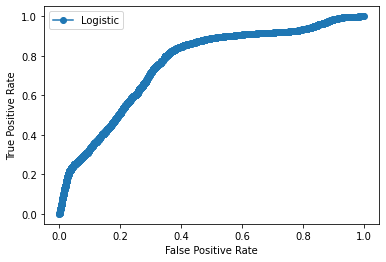

In [50]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(np.array(Y_test), predictions["proba_pred"])
plt.plot(fpr, tpr, marker='o', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Ans 7. Interquartile Range(IQR) Method can be used for handling outliers

Ans 8 Chi-square is used to analyze Determine the relationship b/w the variables
and Compare observed results with expected results

Ans 9 VIF can detect multicollinearity

Ans 10 predict_proba will predict the class probabilities

Ans 11 Logistic regression is useful for regression problems True

Ans 12 if the predicted logit is 0, the transformed probability is 0.5

Ans 13 Multinomial logistic regression is used when you have
a categorical dependent variable with more than two values

Ans 14 0.70 to 0.85

Ans 15 0.30 to 0.40

In [51]:
df.specificity.mean()

0.35194748358862143

In [52]:
from sklearn.metrics import classification_report
print(classification_report(predictions.Actual,predictions.pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86      6764
           1       0.65      0.24      0.35      2285

    accuracy                           0.77      9049
   macro avg       0.72      0.60      0.61      9049
weighted avg       0.75      0.77      0.73      9049



Ans 16 0.70 to 0.80

Ans 17 9049

Ans 18 A 0.30 to 0.40 

Ans 19

In [53]:
predictions.loc[predictions["Actual"] == predictions["pred"]].shape[0]

7011